<a href="https://colab.research.google.com/github/deveshsharma09/AI-in-Healthcare-ML-Case-Study/blob/main/AI_in_HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('/content/AI_in_HealthCare_Dataset CSV.csv')

In [3]:
# Dataset First Look
df.head(10)

Patient_ID  Age  Gender  Blood_Pressure  Heart_Rate  Temperature  \
0           1   62  Female      102.349134   79.827209    98.912361   
1           2   65    Male      137.760933   72.817449    98.912508   
2           3   82    Male       97.618564   57.135424    99.189728   
3           4   85    Male      121.743752   67.355838    96.033487   
4           5   85    Male      129.530450   64.849416    99.077675   
5           6   27    Male      112.347421   78.221150    96.776912   
6           7   39  Female      110.013532   78.089784    96.682222   
7           8   54    Male      130.085819   84.042022    99.853692   
8           9   88    Male      105.315300   82.211735    97.041502   
9          10   30    Male       85.722348   78.592848   100.255474   

       Diagnosis    Medication  Treatment_Duration Insurance_Type  \
0   Hypertension       Statins                  24      Uninsured   
1   Hypertension       Insulin                  29      Uninsured   
2      Influenza  Chemotherapy                  15        Private   
3  Heart Disease  Chemotherapy                   5        Private   
4  Heart Disease       Insulin                  10        Private   
5         Cancer  Chemotherapy                  22       Medicaid   
6      Influenza       Statins                  15        Private   
7   Hypertension  Chemotherapy                   1       Medicaid   
8         Cancer       Aspirin                  16       Medicaid   
9       Diabetes       Aspirin                  21        Private   

   Doctor_Name        Hospital_Name  Lab_Test_Results X-ray_Results  \
0    Dr. Brown  Children's Hospital        114.906151      Abnormal   
1     Dr. Wang    Healthcare Clinic         88.556974        Normal   
2  Dr. Johnson  Children's Hospital        106.705047        Normal   
3    Dr. Smith    Healthcare Clinic         83.043268        Normal   
4      Dr. Lee  Children's Hospital         85.543826      Abnormal   
5     Dr. Wang  Children's Hospital        117.733658        Normal   
6    Dr. Brown  Children's Hospital         81.197673      Abnormal   
7     Dr. Wang  Children's Hospital         60.290457      Abnormal   
8    Dr. Brown  City Medical Center        120.407579        Normal   
9    Dr. Smith    Regional Hospital         90.814670        Normal   

          Surgery_Type  Recovery_Time   Allergies Family_History  \
0         Appendectomy              5       Latex  Heart Disease   
1     Knee Replacement              2   Shellfish       Diabetes   
2  Gallbladder Removal              7         NaN   Hypertension   
3     Cataract Surgery              7       Latex   Hypertension   
4         Appendectomy              9   Shellfish       Diabetes   
5          Angioplasty              9       Latex       Diabetes   
6     Knee Replacement              1         NaN   Hypertension   
7     Knee Replacement              6  Penicillin  Heart Disease   
8         Appendectomy              6       Latex         Cancer   
9  Gallbladder Removal              8       Latex       Diabetes   

   Patient_Satisfaction  AI_Diagnosis_Confidence  
0                     3                 0.917404  
1                     4                 0.811706  
2                     2                 0.802673  
3                     5                 0.816811  
4                     1                 0.750850  
5                     2                 0.906028  
6                     1                 0.889283  
7                     3                 0.764506  
8                     4                 0.982999  
9                     3                 0.790549

In [4]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 5000
Number of columns: 20


In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Blood_Pressure           5000 non-null   float64
 4   Heart_Rate               5000 non-null   float64
 5   Temperature              5000 non-null   float64
 6   Diagnosis                5000 non-null   object 
 7   Medication               5000 non-null   object 
 8   Treatment_Duration       5000 non-null   int64  
 9   Insurance_Type           5000 non-null   object 
 10  Doctor_Name              5000 non-null   object 
 11  Hospital_Name            5000 non-null   object 
 12  Lab_Test_Results         5000 non-null   float64
 13  X-ray_Results            5000 non-null   object 
 14  Surgery_Type            

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

print("Number of duplicate rows in the dataset:", duplicate_count)

Number of duplicate rows in the dataset: 0


In [7]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

print("Number of missing/null values in each column:")
print(missing_values_count)

Number of missing/null values in each column:
Patient_ID                   0
Age                          0
Gender                       0
Blood_Pressure               0
Heart_Rate                   0
Temperature                  0
Diagnosis                    0
Medication                   0
Treatment_Duration           0
Insurance_Type               0
Doctor_Name                  0
Hospital_Name                0
Lab_Test_Results             0
X-ray_Results                0
Surgery_Type                 0
Recovery_Time                0
Allergies                  964
Family_History               0
Patient_Satisfaction         0
AI_Diagnosis_Confidence      0
dtype: int64


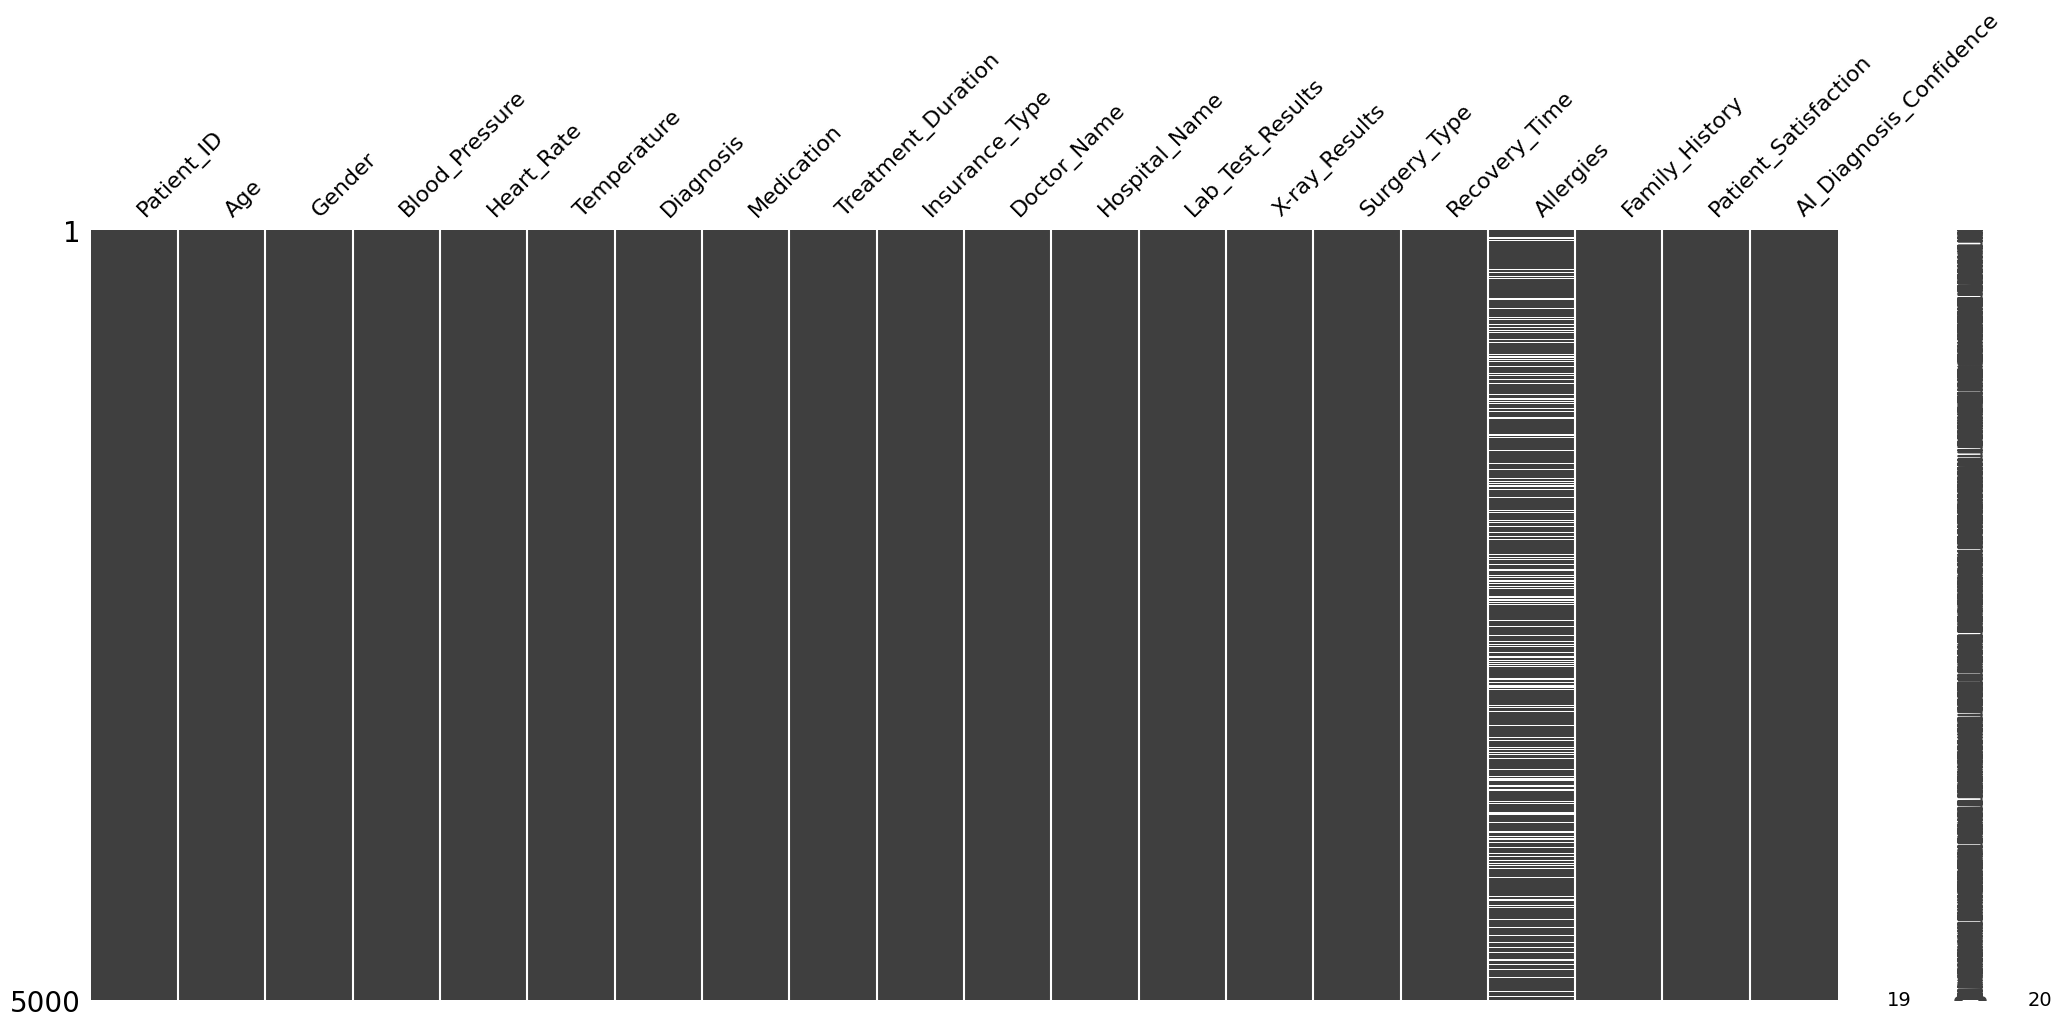

In [8]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [9]:
# Dataset Columns
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Heart_Rate',
       'Temperature', 'Diagnosis', 'Medication', 'Treatment_Duration',
       'Insurance_Type', 'Doctor_Name', 'Hospital_Name', 'Lab_Test_Results',
       'X-ray_Results', 'Surgery_Type', 'Recovery_Time', 'Allergies',
       'Family_History', 'Patient_Satisfaction', 'AI_Diagnosis_Confidence'],
      dtype='object')

In [10]:
# Dataset Describe
print(df.describe())

        Patient_ID          Age  Blood_Pressure   Heart_Rate  Temperature  \
count  5000.000000  5000.000000     5000.000000  5000.000000  5000.000000   
mean   2500.500000    53.433200      119.863621    74.755327    98.603710   
std    1443.520003    20.931669       15.055656     9.974505     1.002509   
min       1.000000    18.000000       61.940115    36.760595    94.930131   
25%    1250.750000    35.000000      109.896065    67.935319    97.929791   
50%    2500.500000    53.000000      119.772157    75.000152    98.618301   
75%    3750.250000    72.000000      129.893989    81.556148    99.265743   
max    5000.000000    89.000000      168.092063   117.198456   102.497318   

       Treatment_Duration  Lab_Test_Results  Recovery_Time  \
count         5000.000000       5000.000000    5000.000000   
mean            14.965400        100.201480       4.944200   
std              8.403495         19.813474       2.570994   
min              1.000000         24.567602       1.000000

In [11]:
# Check Unique Values for each variable.
unique_values_per_variable = {}
for column in df.columns:
    unique_values_per_variable[column] = df[column].unique()

for column, unique_values in unique_values_per_variable.items():
    print(f"Unique values for {column}:")
    print(unique_values)

Unique values for Patient_ID:
[   1    2    3 ... 4998 4999 5000]
Unique values for Age:
[62 65 82 85 27 39 54 88 30 76 83 57 64 55 43 38 87 67 47 37 32 50 75 49
 41 53 73 46 52 18 71 23 56 35 22 60 19 59 29 86 24 21 70 33 31 66 68 28
 61 77 20 80 45 69 72 74 78 48 42 58 44 84 79 34 51 89 36 63 26 40 81 25]
Unique values for Gender:
['Female' 'Male']
Unique values for Blood_Pressure:
[102.3491337  137.7609333   97.61856352 ... 121.5067469  130.3883978
 127.0324139 ]
Unique values for Heart_Rate:
[79.8272095  72.81744866 57.13542389 ... 72.34038895 86.26848878
 59.1647078 ]
Unique values for Temperature:
[98.91236106 98.91250761 99.18972805 ... 98.14252149 96.2246252
 98.00665315]
Unique values for Diagnosis:
['Hypertension' 'Influenza' 'Heart Disease' 'Cancer' 'Diabetes']
Unique values for Medication:
['Statins' 'Insulin' 'Chemotherapy' 'Aspirin' 'Antibiotics']
Unique values for Treatment_Duration:
[24 29 15  5 10 22  1 16 21  2  8 20 23  7  3  4 12 18 27  9  6 11 25 19
 17 14 28 13 26

In [12]:
# Write your code to make your dataset analysis ready.

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
#df = pd.read_csv('your_dataset.csv')


# Define columns with missing values and their treatment strategy
missing_columns = ['Allergies']
missing_strategy = 'mean'

# Define numerical and categorical columns
numerical_columns = ['Patient_ID', 'Age', 'Blood_Pressure', 'Heart_Rate', 'Temperature', 'Treatment_Duration', 'Lab_Test_Results', 'Recovery_Time', 'Patient_Satisfaction', 'AI_Diagnosis_Confidence']
categorical_columns = ['Gender', 'Diagnosis', 'Medication', 'Insurance_Type', 'Doctor_Name', 'Hospital_Name', 'X-ray_Results', 'Surgery_Type', 'Allergies', 'Family_History']

# Create pipelines for numerical and categorical preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy=missing_strategy)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

# Apply preprocessing to the features (X)
X_preprocessed = preprocessor.fit_transform(df)

# Now X_preprocessed is your analysis-ready dataset
print(X_preprocessed)



[[-1.73170443  0.40931551 -1.16343246 ...  0.          1.
   0.        ]
 [-1.73101161  0.55265334  1.18886227 ...  1.          0.
   0.        ]
 [-1.73031879  1.36490106 -1.4776694  ...  0.          0.
   1.        ]
 ...
 [ 1.73031879 -1.31073847  0.10914767 ...  0.          0.
   0.        ]
 [ 1.73101161  1.31712178  0.69912787 ...  0.          1.
   0.        ]
 [ 1.73170443 -1.54963486  0.47620039 ...  1.          0.
   0.        ]]


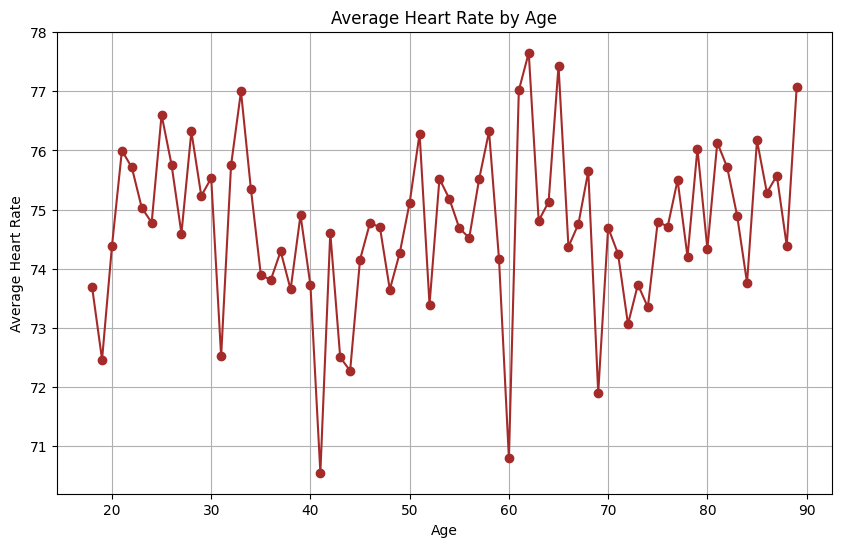

In [13]:
# Chart - 1 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset has columns 'Age' and 'HeartRate', adjust column names accordingly

# Group data by 'Age' and calculate the average heart rate for each age group
average_heart_rate_by_age = df.groupby('Age')['Heart_Rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_heart_rate_by_age['Age'], average_heart_rate_by_age['Heart_Rate'], marker='o', linestyle='-', color= 'brown')
plt.title('Average Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Heart Rate')
plt.grid(True)
plt.show()


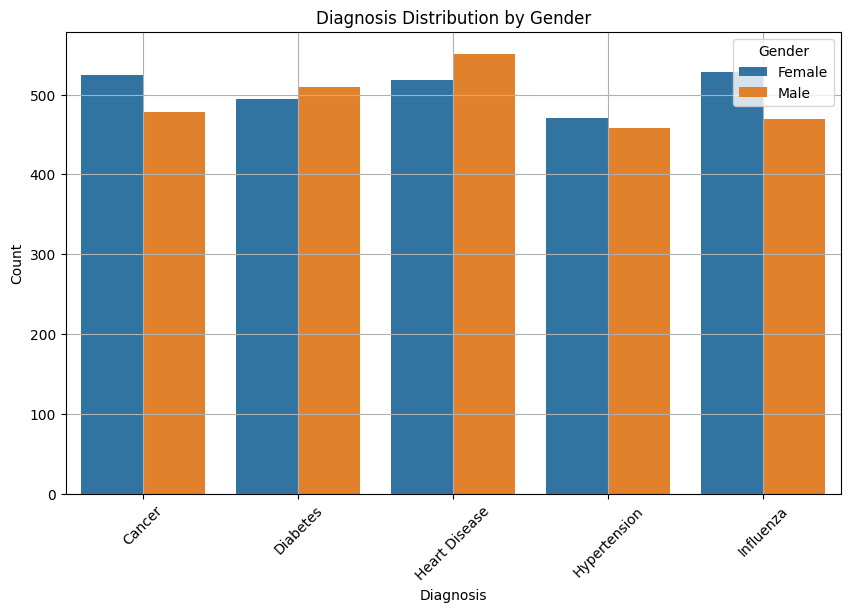

In [14]:
# Chart - 2 visualization code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Count diagnosis occurrences by gender
diagnosis_counts = df.groupby(['Gender', 'Diagnosis']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='Count', hue='Gender', data=diagnosis_counts)
plt.title('Diagnosis Distribution by Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

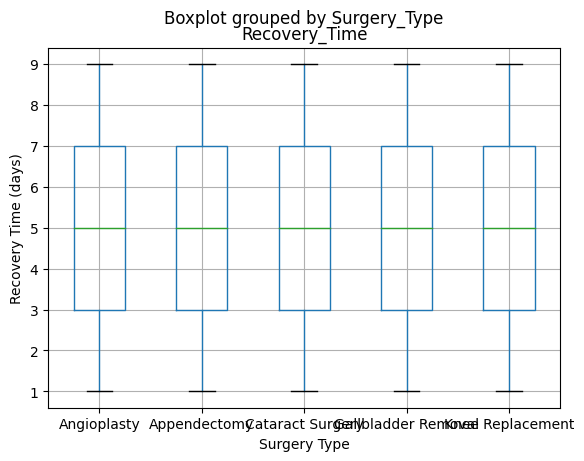

In [15]:
# Chart - 3 visualization code

import matplotlib.pyplot as plt
df.boxplot(column='Recovery_Time', by='Surgery_Type')
plt.xlabel('Surgery Type')
_ = plt.ylabel('Recovery Time (days)')

<ipython-input-16-055c771fe3fe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Blood_Pressure', hue='Gender', data=df, ci=None)


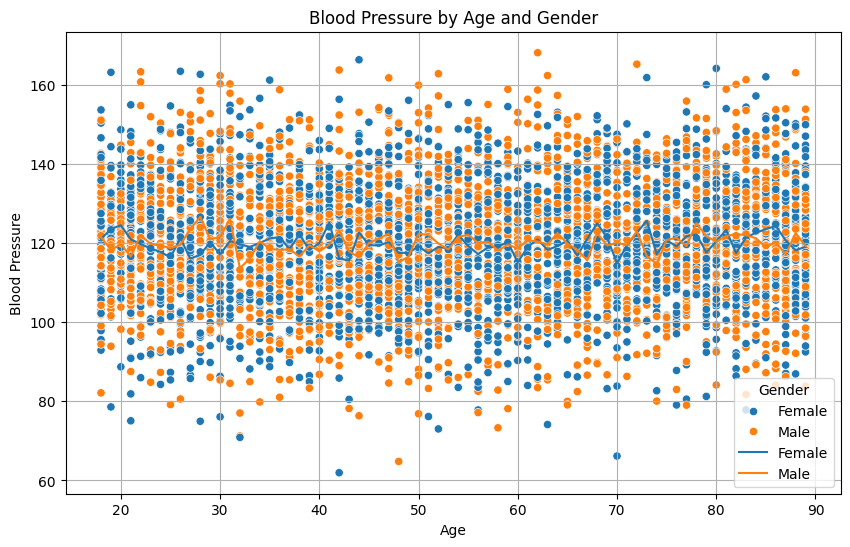

In [16]:
# Chart - 4 visualization code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Blood_Pressure', hue='Gender', data=df)
sns.lineplot(x='Age', y='Blood_Pressure', hue='Gender', data=df, ci=None)
plt.title('Blood Pressure by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


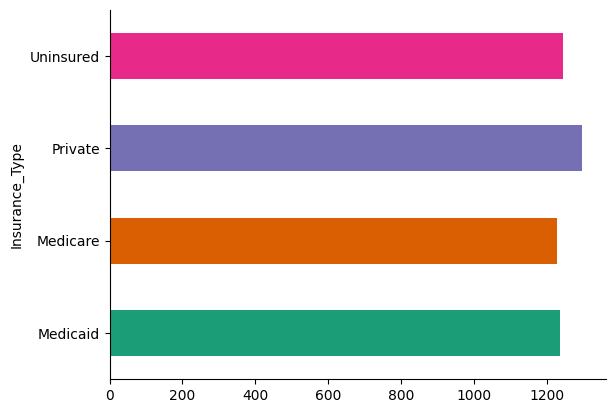

In [17]:
# Chart - 5 visualization code

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Insurance_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

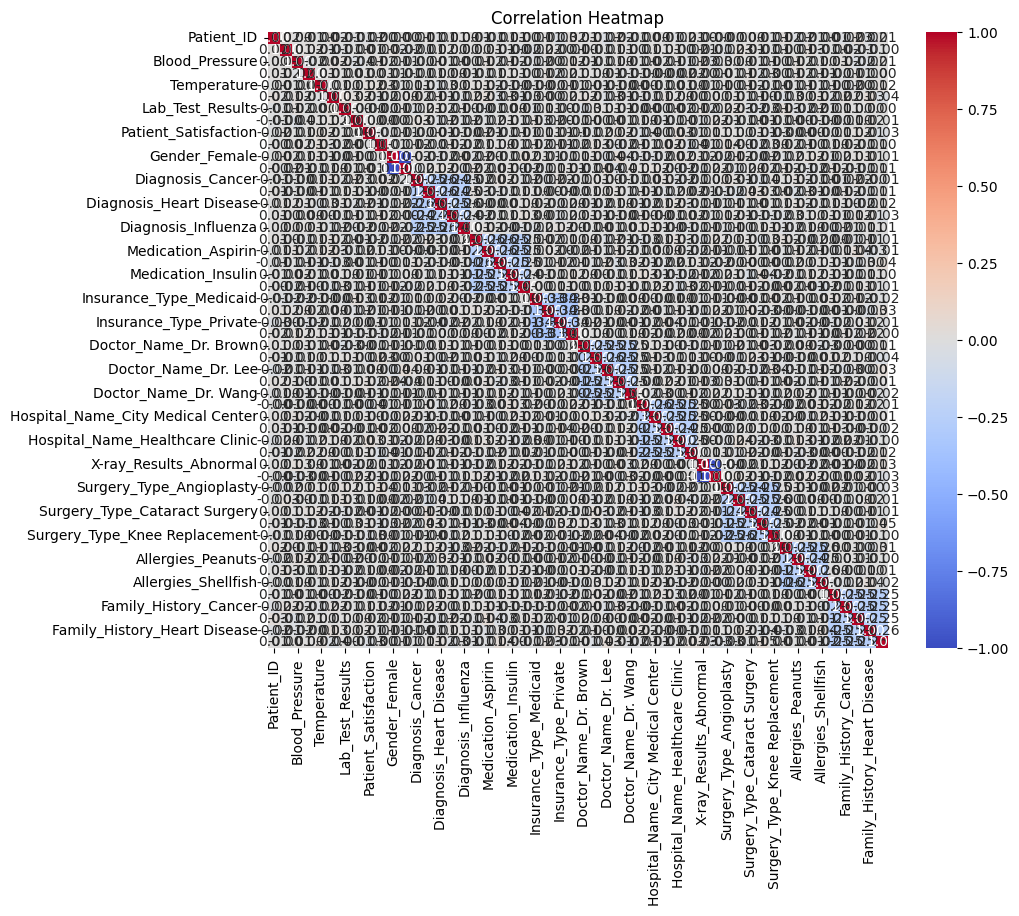

In [18]:
# Correlation Heatmap visualization code

# Encoding non-numeric columns using one-hot encoding
encoded_df = pd.get_dummies(df)  # Convert categorical variables into dummy/indicator variables

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


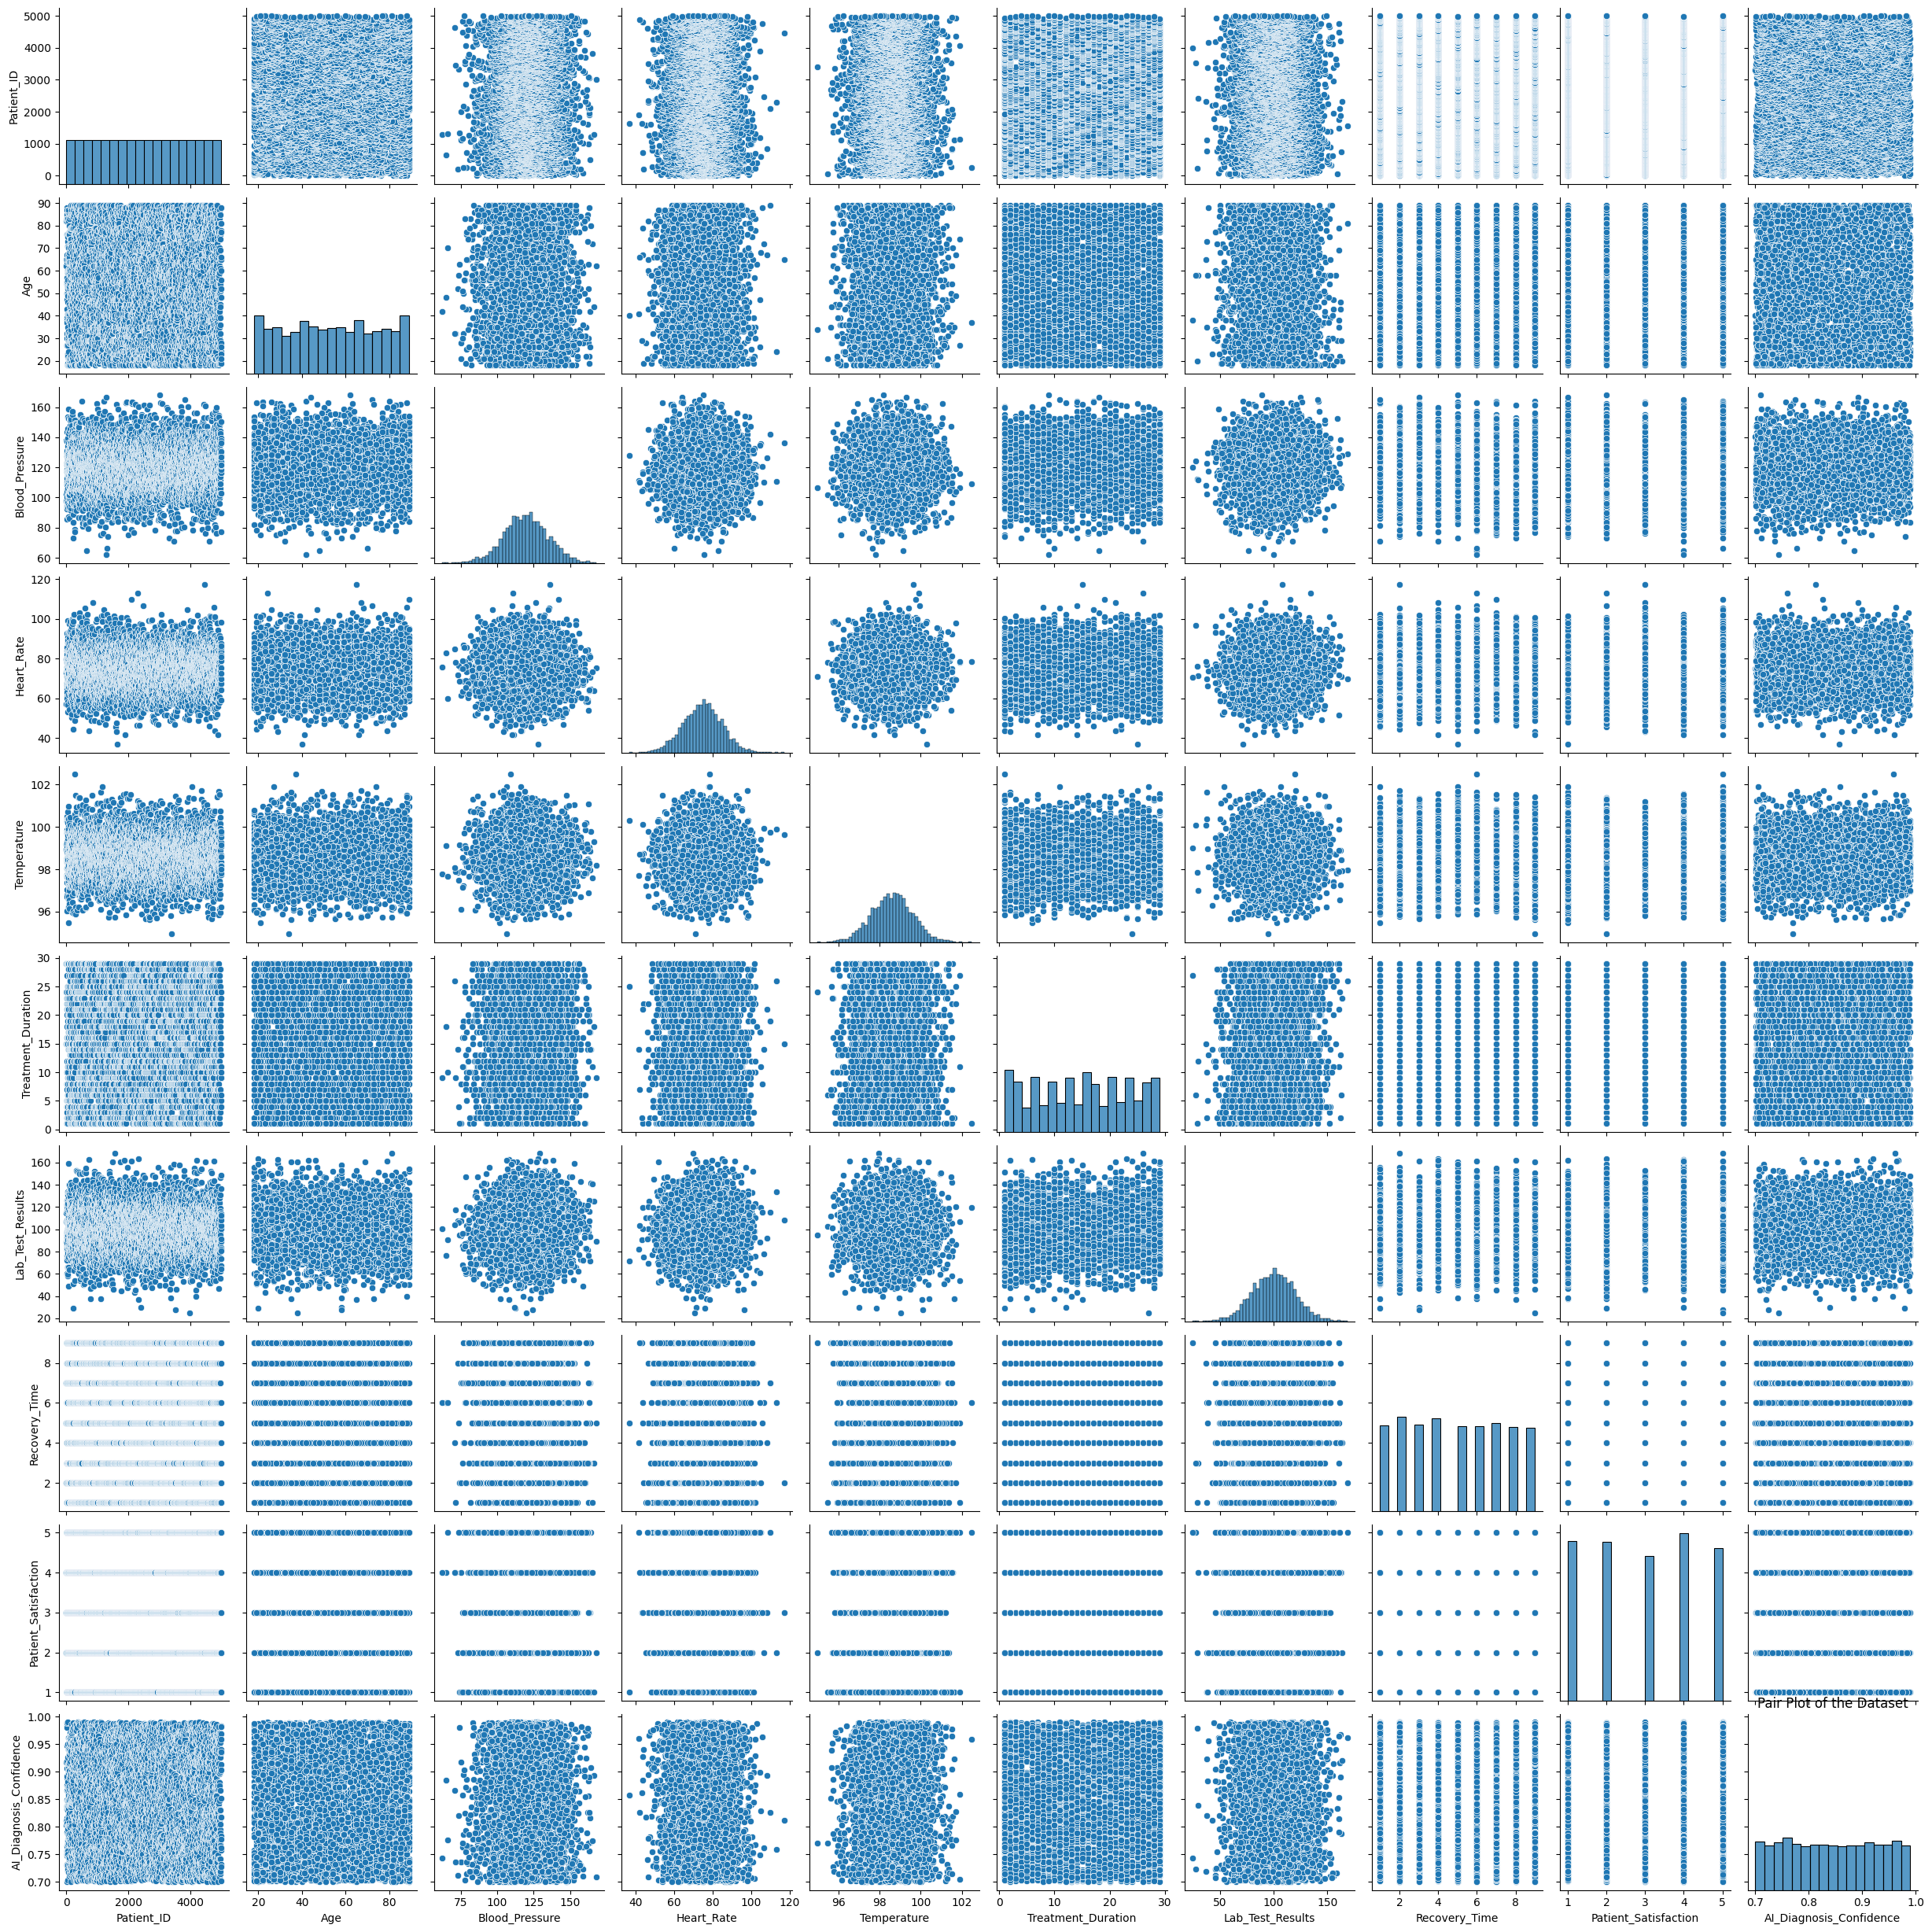

In [19]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df)
plt.title('Pair Plot of the Dataset')
plt.show()


1.    There is a significant difference in blood pressure between males and females.
2.    There is a significant correlation between Age and Blood Pressure.

1.   There is a significant difference in recovery time between different surgery types.

In [26]:
# Perform Statistical Test to obtain P-Value for statement 1

from scipy.stats import ttest_ind


blood_pressure_male = df[df['Gender'] == 'Male']['Blood_Pressure']
blood_pressure_female = df[df['Gender'] == 'Female']['Blood_Pressure']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(blood_pressure_male, blood_pressure_female)

# Print the p-value
print("P-Value from Two-sample t-test:", p_value)


P-Value from Two-sample t-test: 0.6135329432429415


In [25]:
# Perform Statistical Test to obtain P-Value statement 2

from scipy.stats import pearsonr


age = df['Age']
blood_pressure = df['Blood_Pressure']

# Perform Pearson correlation test
pearson_corr, p_value = pearsonr(age, blood_pressure)

# Print the p-value
print("P-Value from Pearson correlation test:", p_value)


P-Value from Pearson correlation test: 0.3021373182726751


In [24]:
# Perform Statistical Test to obtain P-Value statement 3

from scipy.stats import f_oneway


surgery_types = df['Surgery_Type'].unique()
grouped_data = [df[df['Surgery_Type'] == st]['Recovery_Time'] for st in surgery_types]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("P-Value from ANOVA test:", p_value)


P-Value from ANOVA test: 0.9072789648029147


In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer



# Display the count of missing values for each column
print("Missing Values Count:")
print(df.isnull().sum())

# Define the columns with missing values and their treatment strategy
# Replace 'missing_columns' with the actual columns with missing values
missing_columns = ['Allergies']

# Perform missing value imputation
imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' strategy for non-numeric columns
df[missing_columns] = imputer.fit_transform(df[missing_columns])

# Verify that missing values have been imputed
print("\nAfter Imputation - Missing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Patient_ID                   0
Age                          0
Gender                       0
Blood_Pressure               0
Heart_Rate                   0
Temperature                  0
Diagnosis                    0
Medication                   0
Treatment_Duration           0
Insurance_Type               0
Doctor_Name                  0
Hospital_Name                0
Lab_Test_Results             0
X-ray_Results                0
Surgery_Type                 0
Recovery_Time                0
Allergies                  964
Family_History               0
Patient_Satisfaction         0
AI_Diagnosis_Confidence      0
dtype: int64

After Imputation - Missing Values Count:
Patient_ID                 0
Age                        0
Gender                     0
Blood_Pressure             0
Heart_Rate                 0
Temperature                0
Diagnosis                  0
Medication                 0
Treatment_Duration         0
Insurance_Type             0
Doctor_Name  

In [33]:
import pandas as pd

# Calculate the IQR (Interquartile Range) for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treat outliers by capping them with the upper and lower bounds
for col in numerical_columns:
    df[col] = df[col].clip(lower_bound[col], upper_bound[col])

# Display the count of outliers after treatment
outliers_after_treatment = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()
print("Outliers Count After Treatment:")
print(outliers_after_treatment)


Outliers Count After Treatment:
Patient_ID                 0
Age                        0
Blood_Pressure             0
Heart_Rate                 0
Temperature                0
Treatment_Duration         0
Lab_Test_Results           0
Recovery_Time              0
Patient_Satisfaction       0
AI_Diagnosis_Confidence    0
dtype: int64


In [32]:
import pandas as pd
import numpy as np



# Calculate the z-scores for each numerical column
z_scores = (df.select_dtypes(include=['number']) - df.select_dtypes(include=['number']).mean()) / df.select_dtypes(include=['number']).std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Replace outliers with NaN
df[outliers] = np.nan

# Print z-scores and outliers
print("Z-Scores:")
print(z_scores)
print("\nOutliers:")
print(outliers)


Z-Scores:
      Patient_ID       Age  Blood_Pressure  Heart_Rate  Temperature  \
0      -1.731531  0.409275       -1.172700    0.512065     0.310300   
1      -1.730839  0.552598        1.196612   -0.195280     0.310447   
2      -1.730146  1.364765       -1.489210   -1.777731     0.588697   
3      -1.729453  1.508088        0.124944   -0.746403    -2.579265   
4      -1.728760  1.508088        0.645932   -0.999323     0.476227   
...          ...       ...             ...         ...          ...   
4995    1.728760 -0.259568        0.117835   -0.495772    -0.407762   
4996    1.729453  1.125892       -1.996022    0.608456    -0.025271   
4997    1.730146 -1.310607        0.109087   -0.243419    -0.462399   
4998    1.730839  1.316990        0.703335    1.162046    -2.387417   
4999    1.731531 -1.549480        0.478795   -1.572959    -0.598772   

      Treatment_Duration  Lab_Test_Results  Recovery_Time  \
0               1.075100          0.746984       0.021704   
1              

In [34]:
import pandas as pd



# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded dataset
print(df_encoded.head())


   Patient_ID  Age  Blood_Pressure  Heart_Rate  Temperature  \
0           1   62      102.349134   79.827209    98.912361   
1           2   65      137.760933   72.817449    98.912508   
2           3   82       97.618564   57.135424    99.189728   
3           4   85      121.743752   67.355838    96.033487   
4           5   85      129.530450   64.849416    99.077675   

   Treatment_Duration  Lab_Test_Results  Recovery_Time  Patient_Satisfaction  \
0                  24        114.906151              5                     3   
1                  29         88.556974              2                     4   
2                  15        106.705047              7                     2   
3                   5         83.043268              7                     5   
4                  10         85.543826              9                     1   

   AI_Diagnosis_Confidence  ...  Surgery_Type_Knee Replacement  \
0                 0.917404  ...                          False   
1       

In [38]:
# Lower Casing

# Convert all string columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [39]:
# Remove Punctuations

import re

# Define a function to remove punctuations
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to all columns in the DataFrame
df = df.applymap(lambda x: remove_punctuations(x) if isinstance(x, str) else x)

In [40]:
# Remove URLs & Remove words and digits contain digits

import re

# Define a function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Define a function to remove words containing digits
def remove_digits_words(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

# Apply the functions to all columns in the DataFrame
df = df.applymap(lambda x: remove_urls(x) if isinstance(x, str) else x)
df = df.applymap(lambda x: remove_digits_words(x) if isinstance(x, str) else x)

In [41]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
# Remove Stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the remove_stopwords function to all columns in the DataFrame
df = df.applymap(lambda x: remove_stopwords(x) if isinstance(x, str) else x)

In [43]:
# Remove White spaces

# Define a function to remove white spaces
def remove_white_spaces(text):
    # Remove white spaces from the beginning and end of the text
    cleaned_text = text.strip()
    return cleaned_text

# Apply the remove_white_spaces function to all columns in the DataFrame
df = df.applymap(lambda x: remove_white_spaces(x) if isinstance(x, str) else x)

In [48]:
import nltk
nltk.download('punkt')

nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import random

# Download WordNet corpus
nltk.download('wordnet')

# Function to get synonyms of a word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

# Function to rephrase a sentence
def rephrase_sentence(sentence):
    words = word_tokenize(sentence)
    rephrased_sentence = []
    for word in words:
        synonyms = get_synonyms(word)
        if synonyms:
            rephrased_sentence.append(random.choice(synonyms))
        else:
            rephrased_sentence.append(word)
    return ' '.join(rephrased_sentence)

# Apply rephrasing to each element in the DataFrame
df = df.applymap(lambda x: rephrase_sentence(x) if isinstance(x, str) else x)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
# Tokenization

import pandas as pd
from nltk.tokenize import word_tokenize

# Tokenize each cell in the dataset
tokenized_data = df.applymap(lambda x: word_tokenize(str(x)))

# Print the tokenized data
print(tokenized_data)


     Patient_ID   Age           Gender Blood_Pressure     Heart_Rate  \
0           [1]  [62]         [female]  [102.3491337]   [79.8272095]   
1           [2]  [65]          [manly]  [137.7609333]  [72.81744866]   
2           [3]  [82]         [virile]  [97.61856352]  [57.13542389]   
3           [4]  [85]          [manly]  [121.7437525]  [67.35583799]   
4           [5]  [85]        [manlike]  [129.5304503]  [64.84941602]   
...         ...   ...              ...            ...            ...   
4995     [4996]  [48]        [distaff]  [121.6375077]  [69.83958399]   
4996     [4997]  [77]         [manful]  [90.04372887]  [80.78243772]   
4997     [4998]  [26]         [female]  [121.5067469]  [72.34038895]   
4998     [4999]  [81]  [female_person]  [130.3883978]  [86.26848878]   
4999     [5000]  [21]         [female]  [127.0324139]   [59.1647078]   

        Temperature            Diagnosis         Medication  \
0     [98.91236106]       [hypertension]           [statin]   
1     [98

In [51]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
#nltk.download('punkt')
#nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to each cell in the dataset
lemmatized_data = df.applymap(lambda x: lemmatize_text(str(x)))

# Print the lemmatized data
print(lemmatized_data)

     Patient_ID Age         Gender Blood_Pressure   Heart_Rate  Temperature  \
0             1  62         female    102.3491337   79.8272095  98.91236106   
1             2  65          manly    137.7609333  72.81744866  98.91250761   
2             3  82         virile    97.61856352  57.13542389  99.18972805   
3             4  85          manly    121.7437525  67.35583799  96.03348678   
4             5  85        manlike    129.5304503  64.84941602  99.07767466   
...         ...  ..            ...            ...          ...          ...   
4995       4996  48        distaff    121.6375077  69.83958399  98.19695584   
4996       4997  77         manful    90.04372887  80.78243772    98.578032   
4997       4998  26         female    121.5067469  72.34038895  98.14252149   
4998       4999  81  female_person    130.3883978  86.26848878   96.2246252   
4999       5000  21         female    127.0324139   59.1647078  98.00665315   

             Diagnosis       Medication Treatment_D

In [52]:
# POS Taging

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging on text
def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

# Apply POS tagging to each cell in the dataset
pos_tagged_data = df.applymap(lambda x: pos_tagging(str(x)))

# Print the POS tagged data
print(pos_tagged_data)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


        Patient_ID         Age                 Gender       Blood_Pressure  \
0        [(1, CD)]  [(62, CD)]         [(female, NN)]  [(102.3491337, CD)]   
1        [(2, CD)]  [(65, CD)]          [(manly, RB)]  [(137.7609333, CD)]   
2        [(3, CD)]  [(82, CD)]         [(virile, NN)]  [(97.61856352, CD)]   
3        [(4, CD)]  [(85, CD)]          [(manly, RB)]  [(121.7437525, CD)]   
4        [(5, CD)]  [(85, CD)]        [(manlike, NN)]  [(129.5304503, CD)]   
...            ...         ...                    ...                  ...   
4995  [(4996, CD)]  [(48, CD)]        [(distaff, NN)]  [(121.6375077, CD)]   
4996  [(4997, CD)]  [(77, CD)]         [(manful, NN)]  [(90.04372887, CD)]   
4997  [(4998, CD)]  [(26, CD)]         [(female, NN)]  [(121.5067469, CD)]   
4998  [(4999, CD)]  [(81, CD)]  [(female_person, NN)]  [(130.3883978, CD)]   
4999  [(5000, CD)]  [(21, CD)]         [(female, NN)]  [(127.0324139, CD)]   

               Heart_Rate          Temperature  \
0      [(79.8

In [53]:
# Vectorizing Text

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert the DataFrame to a list of strings
text_data = df.values.flatten().astype(str)

# Initialize CountVectorizer
# count_vectorizer = CountVectorizer()
# Vectorize the text data
# count_vectors = count_vectorizer.fit_transform(text_data)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Vectorize the text data
tfidf_vectors = tfidf_vectorizer.fit_transform(text_data)

# Print the vectorized data
# print(count_vectors.toarray())
print(tfidf_vectors.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# One-hot encode categorical variables
X = pd.get_dummies(df.drop('AI_Diagnosis_Confidence', axis=1))

# Separate features and target variable
y = df['AI_Diagnosis_Confidence']

# Step 1: Feature Scaling to minimize feature correlation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Dimensionality Reduction using PCA to reduce feature correlation and create new features
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Print the number of components retained after PCA
print("Number of components retained after PCA:", pca.n_components_)

# Concatenate the original and PCA-transformed features
X_combined = pd.concat([X, pd.DataFrame(X_pca)], axis=1)

# Print the first few rows of the combined feature matrix
print("Combined Feature Matrix:")
print(X_combined.head())
# Select your features wisely to avoid overfitting

Number of components retained after PCA: 802
Combined Feature Matrix:
   Patient_ID  Age  Blood_Pressure  Heart_Rate  Temperature  \
0           1   62      102.349134   79.827209    98.912361   
1           2   65      137.760933   72.817449    98.912508   
2           3   82       97.618564   57.135424    99.189728   
3           4   85      121.743752   67.355838    96.033487   
4           5   85      129.530450   64.849416    99.077675   

   Treatment_Duration  Lab_Test_Results  Recovery_Time  Patient_Satisfaction  \
0                  24        114.906151              5                     3   
1                  29         88.556974              2                     4   
2                  15        106.705047              7                     2   
3                   5         83.043268              7                     5   
4                  10         85.543826              9                     1   

   Gender_Male  ...       792       793       794       795       796 

In [65]:
# Select your features wisely to avoid overfitting

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Feature importance scores
feature_importances = regressor.feature_importances_

# Select features based on importance scores
sfm = SelectFromModel(regressor, threshold=0.1)  # Adjust the threshold as needed
sfm.fit(X_train, y_train)

# Selected features
selected_features = X_encoded.columns[sfm.get_support()]

# Subset the data with selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
